In [ ]:
# 본문(HTML)을 해석(parsing) > 할 수 있는 방법) RE(정규식), DOM, CSSOM
# 정규식(Regular Expression)
# https://regexr.com/ (RE 테스트 사이트)

In [1]:
import re

In [2]:
# 특정 패턴을 알 때, 가리는 방법은 RE을 사용하면 된다.
data = '''
홍길동 900101-1212345
김개똥 940222-2134233
'''

In [6]:
# 정규식을 사용하지 않고 뒷자리를 *로 바꾸기
for d in data.splitlines()[1:]:
    lr = d.split()
    num = lr[1].split('-')
    print(f'{lr[0]} {num[0]}-'+'*'*len(num[1])) 

홍길동 900101-*******
김개똥 940222-*******


In [10]:
data = '''
홍길동 900101-121232245
김개똥 9402222-2134233
'''

In [11]:
# re.sub는 특정 패턴이 나오면 바꾼다.
# [0-9]: 숫자, {7} = 7자리 패턴
print(re.sub('[0-9]{7}', '*******', data)) 


홍길동 900101-*******45
김개똥 *******-*******



In [22]:
data = 'Life is too short'
# re.match는 매칭된 값의 위치와 값을 알려준다.
print(re.match('short', data))
print(re.search('short', data))

None
<re.Match object; span=(12, 17), match='short'>


In [25]:
print(re.search('^short', data)) # ^: ~로 시작하는
print(re.search('short\.$', data))

<re.Match object; span=(0, 4), match='Life'>
None


In [26]:
re.findall('[a-zA-Z]+', data) # +: 한번 이상 반복되는

['Life', 'is', 'too', 'short']

In [30]:
re.search('(ABC)+', 'ABCABCABCOK').group(1) # group(0): 매칭된 모든 값을 반환
                                            # 0:모든, 1: 1번이상 반환된 값
                                            # 그룹된 값을 반환하면 캡처링이라 한다.

'ABC'

In [34]:
re.search('(?:ABC)', 'ABCABCABCOK').group(1) # 패턴은 맞지만 group의 형태가 달라서 반환하지 못하고

IndexError: no such group

In [31]:
re.search('(?:ABC)+(OK)', 'ABCABCABCOK').group(1)  # group의 형태를 맞춰주면 반환된다.

'OK'

In [35]:
# 한글이 한번이라도 반복되면, g를 통해서 한글의 순서를 변경한다.
# r을 붙히는 이유는 특정 단어(\) 같은 것을 출력되게 하기 위해 사용한다.
re.sub(r'([가-힣])([가-힣]+)', r'\g<2> \g<1>', '홍길동') 

'길동 홍'

In [41]:
# r을 붙히지 않고 escape 처리를 해줄수도 있다.
re.escape('\n'), re.escape(r'\n'), re.escape('\g')

('\\\n', '\\\\n', '\\\\g')

In [42]:
# \\\n을 문자로 읽으면 \newline이 된다.
# \\\n = \\n = \n (내부적으로)
print(re.escape('\n'))

\



In [70]:
data = '''
010-1234-5204
123-1234-4232
031-3232-2223
02-3132-2312
02)3342-2332
01012345456
010 12314555
+82 010 1234 5552
82 010 1234 5553
'''

re.findall(r'(([0-9]{3})-([0-9]{4})-([0-9]{4}))', data) # 패턴을 찾는법

[('010-1234-5204', '010', '1234', '5204'),
 ('123-1234-4232', '123', '1234', '4232'),
 ('031-3232-2223', '031', '3232', '2223')]

In [50]:
re.findall(r'((\d{3})-(\d{4})-(\d{4}))', data) # 조금 더 간결하게

[('010-1234-5204', '010', '1234', '5204'),
 ('123-1234-4232', '123', '1234', '4232'),
 ('031-3232-2223', '031', '3232', '2223')]

In [51]:
re.findall(r'(([0]\d{2})-(\d{4})-(\d{4}))', data) # []에 감싸면 문자라는 의미다.

[('010-1234-5204', '010', '1234', '5204'),
 ('031-3232-2223', '031', '3232', '2223')]

In [53]:
re.findall(r'(([0]\d{1,2})-(\d{4})-(\d{4}))', data) # [0]: 맨 앞문자는 0 + {1,2}: 최소 한글자, 최대 두글자

[('010-1234-5204', '010', '1234', '5204'),
 ('031-3232-2223', '031', '3232', '2223'),
 ('02-3132-2312', '02', '3132', '2312')]

In [64]:
re.findall(r'(([0]\d{1,2})\D*(\d{4})\D*(\d{4}))', data)  #\D는 숫자가 아닌 문자, *:0번 이상 반복

[('010-1234-5204', '010', '1234', '5204'),
 ('031-3232-2223', '031', '3232', '2223'),
 ('02-3132-2312', '02', '3132', '2312'),
 ('02)3342-2332', '02', '3342', '2332'),
 ('01012345456', '010', '1234', '5456'),
 ('010 12314555', '010', '1231', '4555')]

In [76]:
# 국가 코드가 추가된 경우에 추가하는 법
# ?:[+] 문자열을 찾되 캡처링은 안함
re.findall(r'((?:[+]?\d{1,2})?([0]\d{1,2})\D*(\d{4})\D*(\d{4}))', data)

[('010-1234-5204', '010', '1234', '5204'),
 ('031-3232-2223', '031', '3232', '2223'),
 ('02-3132-2312', '02', '3132', '2312'),
 ('02)3342-2332', '02', '3342', '2332'),
 ('01012345456', '010', '1234', '5456'),
 ('010 12314555', '010', '1231', '4555'),
 ('010 1234 5552', '010', '1234', '5552'),
 ('010 1234 5553', '010', '1234', '5553')]

In [78]:
rst = re.sub('[공영]', '0', '공1공 일2삼4 1234')
rst = re.sub('일|하나', '1', rst)
rst = re.sub('[삼셋]', '3', rst)
rst

'010 1234 1234'

In [79]:
re.sub('[삼셋]', '3',
       re.sub('일|하나', '1',
            re.sub('[공영]', '0', '공1공 일2삼4 2323')
            )
    )

'010 1234 2323'

In [ ]:
# 패턴으로 하는법
p1 = recomplie('')
p2 =
p3 =...
patterns = [p1, p2, p3]

d = ''

for p in patterns[0:]:
    re.sub(p, d)

In [104]:
# email 예시
# email 구조는 id@도메인 이다.
data ='''
    id@gmail.com
    adaefe@gmail.com
    adaeAA2e@gmail.com
    dwwd_ee2@gmail.com
    231dw.wd_ee2@gmail.com
    dw.wd_ee2@gmail.com
'''

re.findall(r'(([a-z]{5,})@([a-z]+\.[a-z]+))',data)

[('adaefe@gmail.com', 'adaefe', 'gmail.com')]

In [90]:
# id: 숫자 포함 + 대문자 포함, 띄어쓰기 x
re.findall(r'(([a-zA-Z0-9_.]{5,})@([a-z]+\.[a-z]+))',data)

[('adaefe@gmail.com', 'adaefe', 'gmail.com'),
 ('adaeAA2e@gmail.com', 'adaeAA2e', 'gmail.com'),
 ('dwwd_ee2@gmail.com', 'dwwd_ee2', 'gmail.com')]

In [105]:
# 간단하게 \w면서 .문자가 포함되도 return
re.findall(r'(((?:\w|[.]){5,})@([a-z]+\.[a-z]+))',data)

[('adaefe@gmail.com', 'adaefe', 'gmail.com'),
 ('adaeAA2e@gmail.com', 'adaeAA2e', 'gmail.com'),
 ('dwwd_ee2@gmail.com', 'dwwd_ee2', 'gmail.com'),
 ('231dw.wd_ee2@gmail.com', '231dw.wd_ee2', 'gmail.com'),
 ('dw.wd_ee2@gmail.com', 'dw.wd_ee2', 'gmail.com')]

In [128]:
re.findall(r'\b(([a-z](?:\w|[.]){4,})@([a-z]+\.[a-z]+)\b)',data)
# 만약 숫자로 시작하는 메일주소를 필터하고 싶다면 flag를 넣어야한다 + MULTILINE

[('adaefe@gmail.com', 'adaefe', 'gmail.com'),
 ('adaeAA2e@gmail.com', 'adaeAA2e', 'gmail.com'),
 ('dwwd_ee2@gmail.com', 'dwwd_ee2', 'gmail.com'),
 ('wd_ee2@gmail.com', 'wd_ee2', 'gmail.com'),
 ('dw.wd_ee2@gmail.com', 'dw.wd_ee2', 'gmail.com')]

In [132]:
data ='''
한글@gmail.com
srwawf@gmail.co.kr
d2e232@mail.gmail.co.kr
'''

In [133]:
re.findall(r'\b(([a-z](?:\w|[.]){4,})@([a-z0-9_\-]+(?:[.][a-z]+)+)\b)',data)

[('srwawf@gmail.co.kr', 'srwawf', 'gmail.co.kr'),
 ('d2e232@mail.gmail.co.kr', 'd2e232', 'mail.gmail.co.kr')]

In [463]:
# 홈페이지 나누기
data = """
    http://www.naver.com
    https://www.naver.com
    ftp://www.naver.com
    https://www.naver.com/path1/path2/search.nhn?
    http://search.naver.com/path1/path2/search.nhn?q=어쩌고&k=value
"""

In [136]:
re.findall(r'(http://)', data)

['http://']

In [138]:
re.findall(r'(https?://)', data)

['http://', 'https://']

In [143]:
re.findall(r'((https?)://([a-z0-9_\-]+(?:[.][a-z]+)+))', data)

[('http://www.naver.com', 'http', 'www.naver.com'),
 ('https://www.naver.com', 'https', 'www.naver.com')]

In [146]:
re.findall(r'((https?)://([a-z0-9_\-]+(?:[.][a-z]+)+))((?:/[a-z0-9_\-]+)*)', data)

[('http://www.naver.com', 'http', 'www.naver.com', ''),
 ('https://www.naver.com', 'https', 'www.naver.com', ''),
 ('https://www.naver.com', 'https', 'www.naver.com', '/path1/path2/search')]

In [147]:
re.findall(r'((https?)://([a-z0-9_\-]+(?:[.][a-z]+)+))((?:/[a-z0-9_\-.]+)*)', data) # path도 쪼개기

[('http://www.naver.com', 'http', 'www.naver.com', ''),
 ('https://www.naver.com', 'https', 'www.naver.com', ''),
 ('https://www.naver.com',
  'https',
  'www.naver.com',
  '/path1/path2/search.nhn')]

In [464]:
re.findall(r'((https?)://([a-z0-9_\-]+(?:[.][a-z]+)+)((?:/[a-z0-9_\-.]+)*)\??((?:\&?\w+=\w+)+))', data) # 수정필요


[('http://search.naver.com/path1/path2/search.nhn?q=어쩌고&k=value',
  'http',
  'search.naver.com',
  '/path1/path2/search.nhn',
  'q=어쩌고&k=value')]

In [155]:
# f12 > elemnets > html(구조와 내용)
# body를 받기 위해 다운로드를 바꿔본다
from requests import request, get, post
from requests.exceptions import HTTPError
from time import sleep

def download(url, params = {}, method = 'GET', retrieds = 3):
    try:
        # params와 data를 method에 따라 정의함.
        resp = request(method, 
                       url, 
                       # get은 URL에 모든 매개변수를 배치한다
                       params= params if method == 'GET' else {} ,
                       # post는 모든 매개변수를 본문에 배치한다
                       data = params if method == 'POST' else {},
                       headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}
                      )
        # raise_for_status는 요청/응답 코드가 200이 아니면 예외를 발생              
        resp.raise_for_status()
        # robots.txt => 잘 안돌아감
    except HTTPError as e:
        # 아니면,
        # if resp.status_code != 200:
        if 500 <= e.response.status_code:
            if retrieds > 0:
                sleep(3)
                download(url, method = method, params = params, retrieds = retrieds-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Respones', e.response.headers)
    return resp


In [156]:
url = 'https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98'
resp = download(url)

In [157]:
resp.status_code, resp.headers

(200,
 {'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Tue, 12 Sep 2023 01:56:03 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Strict-Transport-Security': 'max-age=31536000', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-bTNY9Gy_TqTrtiZhvOh3PA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/fff", 'Cross-Origin-Opener-Policy': 'same-origin-allow-popups; report-to="gws"', 'Report-To': '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/fff"}]}', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'br', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Transfer-Encoding': 'chunked', 'Set-Cookie': '1P_JAR=2023-09-12-01; expires=Thu, 12-Oct-2023 01:56:03 GMT; path=/; domain=.google.com; Secure; SameSite=none, AEC=Ad49MVF18oJmlYG7YzvzPEBjw1t_6bZ5bz8

In [158]:
resp.encoding

'UTF-8'

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>카리나 - Google 검색</title><script nonce="bTNY9Gy_TqTrtiZhvOh3PA">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'M8X_ZJ-gIuaSxc8P18e3qAs',kEXPI:'31',kBL:'W6tf',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='ko';})();(function(){
var h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getAttribute||!(
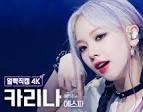
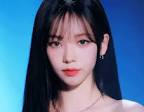
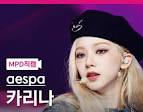
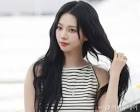
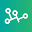
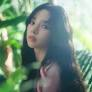
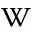
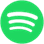
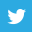
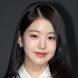
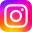
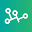
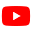
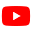
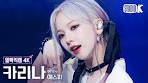
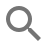
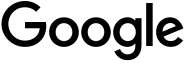

In [160]:
print(resp.text)

In [164]:
re.search('apple','Apple', flags = re.IGNORECASE) # 대소문자 구분 없앰

<re.Match object; span=(0, 5), match='Apple'>

In [168]:
re.search('<title>(.+)</title>',resp.text, flags = re.IGNORECASE) # tag는 처음과 끝에 <>로 묶여있다.

<re.Match object; span=(252, 282), match='<title>카리나 - Google 검색</title>'>

In [169]:
re.search('<title>(.+)</title>',resp.text, flags = re.IGNORECASE).group(1) # title 정보

'카리나 - Google 검색'

In [176]:
# html에서 링크를 찾는법 > a
# <a key = 벨류> </a>
# 키: href
# <img> 키: src

re.findall('href="[^"]+?"', resp.text) 

['href="/search?q=%EC%B9%B4%EB%A6%AC%EB%82%98&amp;client=firefox-b-d&amp;sca_esv=564553619&amp;gbv=1&amp;sei=M8X_ZJ-gIuaSxc8P18e3qAs"',
 'href="#"',
 'href="#"',
 'href="https://support.google.com/websearch/answer/181196?hl=ko"',
 'href="https://www.google.com/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwjfhbj2-6OBAxVmSfEDHdfjDbUQPAgJ"',
 'href="#"',
 'href="/search?client=firefox-b-d&amp;sca_esv=564553619&amp;q=%EC%B9%B4%EB%A6%AC%EB%82%98&amp;tbm=isch&amp;source=lnms&amp;sa=X&amp;ved=2ahUKEwjfhbj2-6OBAxVmSfEDHdfjDbUQ0pQJegQIDRAB"',
 'href="/search?client=firefox-b-d&amp;sca_esv=564553619&amp;q=%EC%B9%B4%EB%A6%AC%EB%82%98&amp;tbm=vid&amp;source=lnms&amp;sa=X&amp;ved=2ahUKEwjfhbj2-6OBAxVmSfEDHdfjDbUQ0pQJegQICxAB"',
 'href="/search?client=firefox-b-d&amp;sca_esv=564553619&amp;q=%EC%B9%B4%EB%A6%AC%EB%82%98&amp;tbm=nws&amp;source=lnms&amp;sa=X&amp;ved=2ahUKEwjfhbj2-6OBAxVmSfEDHdfjDbUQ0pQJegQIDBAB"',
 'href="/search?client=firefox-b-d&amp;sca_esv=564553619&amp;q=%EC%B9%B4%EB%A6%AC%EB%82%98+%EC%9D%B4

In [173]:
len(re.findall('<a', resp.text)) # a가 너무 많다.

115

In [178]:
re.findall('<a jsname="UWckNb" href="([^"]+?)"', resp.text) 

['https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)',
 'https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98_(%EA%B0%80%EC%88%98)',
 'https://www.instagram.com/karina_aespas_/',
 'https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)?rev=3170',
 'https://www.youtube.com/watch?v=prSFnMkjtlI',
 'https://www.youtube.com/watch?v=gO_ONOnzH-s']

In [182]:
len(re.findall('<img ', resp.text))

54

['data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
 '']
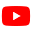

In [183]:
re.findall('<img alt=".+?" id=".+?" src="(.+?)"', resp.text) # base64 decoding하면 image로 저장가능(해보기)

In [241]:
# 네이버 링크와 이미지 따오기
naver_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%B9%B4%EB%A6%AC%EB%82%98'
resp = download(naver_url)

In [242]:
resp.status_code, resp.headers['content-type'], resp.encoding

(200, 'text/html; charset=UTF-8', 'UTF-8')

In [244]:
len(re.findall('<a ',resp.text))

611

In [246]:
# post된 글 링크 찾기
re.findall('<a(?: target="_blank")? href="([^"]+?)" class="(?:link_tit|news_tit)"', resp.text)

['https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98%28aespa%29',
 'https://tencarat.co.jp/karina/',
 'http://sports.khan.co.kr/news/sk_index.html?art_id=202309111724003&sec_id=540101&pt=nv',
 'https://www.starnewskorea.com/stview.php?no=2023091118032779966',
 'http://sports.chosun.com/news/ntype.htm?id=202309110100082270009731&servicedate=20230911',
 'http://www.osen.co.kr/article/G1112181012',
 'https://hajuns1469-upandgo.com/337',
 'https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98_%28%EA%B0%80%EC%88%98%29',
 'https://www.instagram.com/AESPA_OFFICIAL/']

In [247]:
print(resp.text)

<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="카리나 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'카리나'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'카리나'의 네이버 통합검색 결과입니다."> <title>카리나 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/ss

In [252]:
# 이미지 찾기 > 다이나믹 에스티메이트
re.findall('<img src="(data:image/gif;base64,[^"]+)"', resp.text)

['data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7',
 'da

In [326]:
# 다음 링크와 이미지 따오기
# 실습해보기 !!

# 네이버 링크와 이미지 따오기
daum_url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%B9%B4%EB%A6%AC%EB%82%98'
resp = download(daum_url)

In [327]:
resp.status_code, resp.headers['content-type'], resp.encoding

(200, 'text/html; charset=utf-8', 'utf-8')

In [331]:
print(resp.text)











































<!doctype html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="pc win firefox">
    
<head profile="http://a9.com/-/spec/opensearch/1.1/">
    <meta http-equiv="content-Type" content="text/html;charset=utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta name="autocomplete" content="off" />
    <meta name="referrer" content="always">
    <meta name="format-detection" content="telephone=no" />
    <meta property="og:title" content="카리나 &ndash; Daum 검색" />
    <meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%EC%B9%B4%EB%A6%AC%EB%82%98" />
    <meta property="og:description" content="Daum 검색에서 카리나에 대한 최신정보를 찾아보세요." />
    <meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />
    <meta property="og:site_name" content="다음검색" />
    <title>카리나 &ndash; Daum 검색</title>

    
<link rel="search" type="application/opensearchdescription+

In [358]:
# post된 글 링크 찾기
re.findall('<c(?:-header-item|-thumb) data-target="_blank" data-href="([^"]+?)"', resp.text)

['https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98%20%28%EB%B0%B0%EC%9A%B0%29',
 'https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)',
 'https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)',
 'https://cafe.daum.net/subdued20club',
 'https://cafe.daum.net/subdued20club/ReHf/4523290?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1',
 'https://cafe.daum.net/ssaumjil',
 'https://cafe.daum.net/ssaumjil/LnOm/3029160?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1',
 'https://cafe.daum.net/Duckgu',
 'https://cafe.daum.net/Duckgu/D2nu/41713?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1',
 'https://cafe.daum.net/dotax',
 'https://cafe.daum.net/dotax/Elgq/4240303?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1',
 'https://cafe.daum.net/SoulDresser',
 'https://cafe.daum.net/SoulDresser/FLTB/752076?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1',
 'https://table.cafe.daum.net/t/1217111531',
 'https://nizniz.tistory.com/',
 'https://nizniz.ti

In [363]:
# 사진 찾기
re.findall('<img src="([^"]+)"', resp.text)

['//search1.daumcdn.net/search/statics/common/pi/logo/daumlogo_170324.png',
 'https://search1.daumcdn.net/thumb/C320x400.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fcontentshub%2Fsdb%2F506d297277c9b2c2f0b50138a99bc902d2236bb47a2fcde28cfffa16b0d674d4',
 'https://search1.daumcdn.net/thumb/S292x166.q85/?fname=https%3A%2F%2Fthumb.kakaocdn.net%2Fdna%2Fkamp%2Fsource%2Frv5lh3zbww6kawxn0ybcxpuec%2Fthumbs%2Fthumb.jpg%3Fcredential%3DTuMuFGKUIcirOSjFzOpncbomGFEIdZWK%26expires%3D33243367853%26signature%3Dhga6OnAgexoH%252Fkyz%252B6qFszpLXJY%253D%26ts%3D1686459053',
 'https://search1.daumcdn.net/thumb/S292x166.q85/?fname=https%3A%2F%2Fthumb.kakaocdn.net%2Fdna%2Fkamp%2Fsource%2Frvoql31d16cjle4em60ce992k%2Fthumbs%2Fthumb.jpg%3Fcredential%3DTuMuFGKUIcirOSjFzOpncbomGFEIdZWK%26expires%3D33243367549%26signature%3DR2cdjvHniXpRsqKcoPwmAdupIg4%253D%26ts%3D1686458749',
 'https://search1.daumcdn.net/thumb/S292x166.q85/?fname=https%3A%2F%2Fthumb.kakaocdn.net%2Fdna%2Fkamp%2Fsource%2Frv775i21ol1jwtz2o7kx41nxs%2Fthum

In [258]:
re.findall('<a(?:\s+[^=]+?="[^"]+?")+>(.+?)</a>', resp.text) # a와 a 안에 있는 내용들

['<span>메뉴 영역으로 바로가기</span>',
 '<span>본문 영역으로 바로가기</span>',
 '<i class="spnew ico_logo">NAVER</i>',
 '<i class="spnew ico_keyboard">한글 입력기</i>',
 '자동완성 레이어</i>',
 '전체삭제',
 ' <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> ',
 '<i class="imsc ico_del">삭제</i>',
 '도움말',
 '도움말',
 '도움말',
 '자동저장 끄기',
 ' <span class="common_ico_kwd"><i class="imsc ico_search"></i></span> <div class="dsc_area"> <span class="tit">@5@회 로또당첨번호</span> <span class="dsc"> <span class="item">동행복권 제공</span> </span> </div> <span class="etc_area"> <span class="etc lotto"> <em class="n@6@">@6@</em><em class="n@7@">@7@</em><em class="n@8@">@8@</em><em class="n@9@">@9@</em><em class="n@10@">@10@</em><em class="n@11@">@11@</em><em class="imsc_bf bonus n@12@">@12@</em> </span> </span> ',
 ' <span class="common_ico_kwd"><i class="imsc ico @12@">@14@</i></span> <div class="dsc_area"> <span class="tit">@txt@<span class="sub">@currency@</span></span> <span class="dsc

In [321]:
# 공통된 조건을 주어서 tag 단위로 따올 수 있다.
# href 찾기
# re.findall('<a(?:(?:\s+[^=]+?="[^"]+?"))+)\s+href="([^"])">(.+?)</a>', resp.text) 
re.findall('<a(?:(?:\s+(?:[^=]+?="[^"]+?"))+)\s+href="([^"])"(?:(?:\s+(?:[^=]+?="[^"]+?"))+)>(.+?)</a>', resp.text)

[('#', '<i class="spnew ico_keyboard">한글 입력기</i>'),
 ('#', '자동완성 레이어</i>'),
 ('#', '전체삭제'),
 ('#', '<i class="imsc ico_option">컨텍스트 자동완성</i>'),
 ('#', '<i class="spnew2 ico_nav_more">더보기</i>'),
 ('#', '<i class="spnew2 ico_nav_option"></i>검색옵션'),
 ('#',
  '직접입력<i class="spnew ico_check">옵션<em class="open">펼치기</em><em class="close">접기</em></i>'),
 ('#',
  '</a> </span> <span class="set etc"> <span class="spnew ico_since"></span> </span> <span class="set"> <span class="blind">기간 설정끝</span> <a onclick="tCR(\'a=opt.fin\');" href="#" role="tab" class="spnew_bf ico_calendar _end_trigger" aria-selected="false">'),
 ('#', ' <i class="spnew ico_save">문서 저장하기</i> '),
 ('#', '이전</span>'),
 ('#', '다음</span>'),
 ('#', '<span class="blind">이전</span>'),
 ('#', '<span class="blind">다음</span>'),
 ('#', '이전'),
 ('#', '다음'),
 ('#', '곡'),
 ('#', '앨범'),
 ('#', '공연'),
 ('#', '방송'),
 ('#', '이전'),
 ('#', '다음'),
 ('#', '이전'),
 ('#', '다음'),
 ('#', '이전'),
 ('#', '다음'),
 ('#', '이전'),
 ('#', '다음'),
 ('#', '이전'),
 

In [319]:
# image 찾기
re.findall('<img(?:(?:\s+(?:[^=]+?="[^"]+?"))*)\s+src="([^"]+)"', resp.text)

['https://search.pstatic.net/common?type=b&size=336&expire=1&refresh=true&quality=100&direct=true&src=https%3A%2F%2Fi.ytimg.com%2Fvi%2FD5iWmo4eocQ%2Fmaxresdefault.jpg',
 'https://search.pstatic.net/common?type=b&size=336&expire=1&refresh=true&quality=100&direct=true&src=https%3A%2F%2Fi.ytimg.com%2Fvi%2FD5iWmo4eocQ%2Fmaxresdefault.jpg',
 'https://search.pstatic.net/common?type=b&size=336&expire=1&refresh=true&quality=100&direct=true&src=https%3A%2F%2Fpbs.twimg.com%2Famplify_video_thumb%2F1699537018639048704%2Fimg%2FebKHAxy8cvdSUphe.jpg',
 'https://search.pstatic.net/common?type=b&size=336&expire=1&refresh=true&quality=100&direct=true&src=https%3A%2F%2Fpbs.twimg.com%2Famplify_video_thumb%2F1699537018639048704%2Fimg%2FebKHAxy8cvdSUphe.jpg',
 'https://search.pstatic.net/common?type=b&size=336&expire=1&refresh=true&quality=100&direct=true&src=https%3A%2F%2Fi.ytimg.com%2Fvi%2FpvAN7KrgOso%2Fmaxresdefault.jpg',
 'https://search.pstatic.net/common?type=b&size=336&expire=1&refresh=true&quality=1

In [287]:
rst = re.findall('(\d)(\w)(\W)?', '1S2D*3T')

In [304]:
rst

[('1', 'S', ''), ('2', 'D', '*'), ('3', 'T', '')]

In [311]:
def re_score(rst):
        result = []
        for i in rst:
            one = int(i[0])
            two = i[1]
            prop = i[2]
            if two == 'S':
                rst_vl = one
            elif two == 'D':
                rst_vl = one*one
            elif two == 'T':
                rst_vl = one*one*one
            if prop == '':
                 result.append(rst_vl)
            elif prop == '#': 
                rst_vl = rst_vl*-1
                result.append(rst_vl)
            elif prop == '*':
                rst_vl = rst_vl*2
                if len(result) == 0:
                     result.append(rst_vl)
                else:
                     result[-1] = result[-1]*2 
                     result.append(rst_vl)
        return sum(result)
                  
            

In [310]:
re_score(rst)

37

In [373]:
# 1. 다트게임 알고리즘
# 다트게임 총 3번
# 0 - 10
# *: 해당 점수와 바로 전에 얻은 점수 *2
# #: # 해당 점수 * -1
# *, # 중첩 가능
# S: 점수^1, D: 점수^2, T: 점수^3
# 계산기 만들기 > 스텍으로 만들면 쌓을 수 있다

def score_ft(input):
    # \d{0,}를 둔 이유는 숫자형이 2개 이상 나올 수 있음.
    rst = re.findall('(\d{0,})(\w)(\W)?', input)
    def re_score(rst):
            result = []
            for i in rst:
                one = int(i[0])
                two = i[1]
                prop = i[2]
                # 이부분은 dict로 만들면 좀더 쉽게 가능
                if two == 'S':
                    rst_vl = one
                elif two == 'D':
                    rst_vl = one*one
                elif two == 'T':
                    rst_vl = one*one*one
                if prop == '':
                     result.append(rst_vl)
                elif prop == '#': 
                    rst_vl = rst_vl*-1
                    result.append(rst_vl)
                elif prop == '*':
                    rst_vl = rst_vl*2
                    if len(result) == 0:
                         result.append(rst_vl)
                    else:
                         result[-1] = result[-1]*2 
                         result.append(rst_vl)
            return sum(result)
    score = re_score(rst)
    return score

In [379]:
print('1S2D*3T: ', score_ft('1S2D*3T'))
print('1D2S#10S:', score_ft('1D2S#10S'))
print('1D2S0T:  ', score_ft('1D2S0T'))
print('1S*2T*3S:', score_ft('1S*2T*3S'))
print('1D#2S*3S:', score_ft('1D#2S*3S'))
print('1T2D3D#: ', score_ft('1T2D3D#'))
print('1D2S3T*: ', score_ft('1D2S3T*'))

1S2D*3T:  37
1D2S#10S: 9
1D2S0T:   3
1S*2T*3S: 23
1D#2S*3S: 5
1T2D3D#:  -4
1D2S3T*:  59


In [677]:
# 2. 카카오 아이디 알고리즘
# 카카오 아이디 규칙
# 3<= len(아아디) <= 15
# 아이디 제약 조건: 알파벳 소문자, 숫자, 빼기(-), 밑줄(_), 마침표(.)
# 마침표는 처음과 끝에 사용 X, 연속(..) 사용 불가
# 만약 위에 제약 조건에 맞지 않는 경우, 아이디를 추천해주는데
# 1단계: new_id의 모든 대문자 > 소문자로 치환
# 2단계: new_id의 알파벳 소문자, 숫자, 빼기(-), 밑줄(_), 마침표(.)를 제외 문자 제거
# 3단계: new_id의 마침표(.) 2번 이상 반복> 1개로 치환
# 4단계: 마침표가 new_id의 처음과 끝에 존재하면 삭제
# 5단계: new_id = null > "a"를 대입 (default값)
# 6단계: len(new_id) >=16, new_id = new_id[:15]
# 7단계: len(new_id) <=2, new_id + 'a'(+.)

# input 조건
# 1<= len(new_id) <= 1000
# new_id에 나타낼 수 있는 특수문자는 -_.~!@#$%^&*()=+[{]}]:?,<>/로 한정

import re

char = re.escape('-_.~!@#$%^&*()=+[{]}]:?,<>/')

def id_sol(id):
    # input check
    # 만약 input을 사용하면, while true로 반복시킬수 있을것
    def id_check(id):
        if (len(id) < 1 | len(id) >1000):
            print('id의 길이가 1이상 1000이하가 아닙니다.')
        else:
            if type(id) != str:
               print('id가 문자열 형식이 아닙니다!')
            else:
                if len(re.match(r'['+char+''+'a-zA-Z0-9]+', id).group(0)) != len(id):
                    print('id에 나타낼 수 없는 특수 문자가 있습니다.')
                else:
                    return id
            
            
    # 제약문 필터 + 대문자 소문자화
    id = id_check(id.lower())

    # 특정 특수문자 제거
    pattern1 = '[^a-z0-9-_.]' #'[^'+chars+']'
    # . 반복 제거
    pattern2 = '[.]{2,}'
    # 마침표가 처음과 끝에 있으면 제거
    pattern3 = '^[.]|[.]$'
    
    patterns = [pattern1, pattern2, pattern3]
    chags = ['', '.', '']
    chag_log = []
    for p, c in zip(patterns, chags):
        id = re.sub(p, c, id)

    # 마지막 id 필터
    if len(id) < 1:
        return id + 'a'*(3-len(id))
    elif (len(id) >= 1 and len(id) <3):
        return id + id[-1]*(3 - len(id))
    elif (len(id) > 3 and len(id) < 16):
        return id  
    elif len(id) >= 16:
        return re.sub(pattern3, '', id[:15])
    else:
        return None

In [678]:
id1 = '...!@BaT#*..y.abcdefghijklm'
id_sol(id1)

'bat.y.abcdefghi'

In [679]:
id2 = 'z-+.^.'
id_sol(id2)

'z--'

In [680]:
id3 = '=.='
id_sol(id3)

'aaa'

In [681]:
id4 = '123_.def'
id_sol(id4)

'123_.def'

In [682]:
id5 = 'abcdefghijklmn.p'
id_sol(id5)

'abcdefghijklmn'